In [ ]:
!pip install tensorflow

  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.



  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached grpcio-1.62.1-cp39-cp39-win_amd64.whl (3.8 MB)
  Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached keras-3.2.0-py3-none-any.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached optree-0.11.0-cp39-cp39-win_amd64.whl (240 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached namex-0.0.7-py3-

In [2]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, \
    Conv2D, \
    MaxPooling2D, \
    Flatten, \
    BatchNormalization, \
    Dropout,\
    Rescaling
# from keras.preprocessing import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import shutil

In [3]:
img_height = 256
img_width = 256
batch_size = 32

In [ ]:
def split_dataset(input_folder, output_folder, train_percent, val_percent, test_percent):
    # Create output folders if they don't exist
    for folder in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_folder, folder), exist_ok=True)

    # List all files in the input folder
    files = os.listdir(input_folder)
    num_files = len(files)

    # Shuffle the list of files
    random.shuffle(files)

    # Calculate the number of files for each set
    train_split = int(train_percent * num_files)
    val_split = int(val_percent * num_files)
    test_split = int(test_percent * num_files)

    # Copy files to corresponding sets
    for i, file in enumerate(files):
        if i < train_split:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'train', file))
        elif i < train_split + val_split:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'val', file))
        else:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'test', file))

# Example usage:
input_folder = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\Images\\StandingPelvicR'
output_folder = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\SplittedImages'
train_percent = 0.6
val_percent = 0.2
test_percent = 0.2

split_dataset(input_folder, output_folder, train_percent, val_percent, test_percent)

In [1]:
!git clone https://github.com/joerivc/MasterThesis.git

Cloning into 'MasterThesis'...
remote: Enumerating objects: 4203, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 4203 (delta 5), reused 3 (delta 1), pack-reused 4186
Receiving objects: 100% (4203/4203), 697.44 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (68/68), done.
Updating files: 100% (11318/11318), done.


In [12]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/MasterThesis/SplittedImages6Classes/train',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/MasterThesis/SplittedImages6Classes/val',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/MasterThesis/SplittedImages6Classes/test',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)

Found 1440 files belonging to 6 classes.
Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


In [13]:
val_batches = tf.data.experimental.cardinality(validation_ds)

In [14]:
class_names = train_ds.class_names
class_names

['Sitting',
 'SittingPelvicRB',
 'SittingPelvicRF',
 'Standing',
 'StandingPelvicRB',
 'StandingPelvicRF']

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


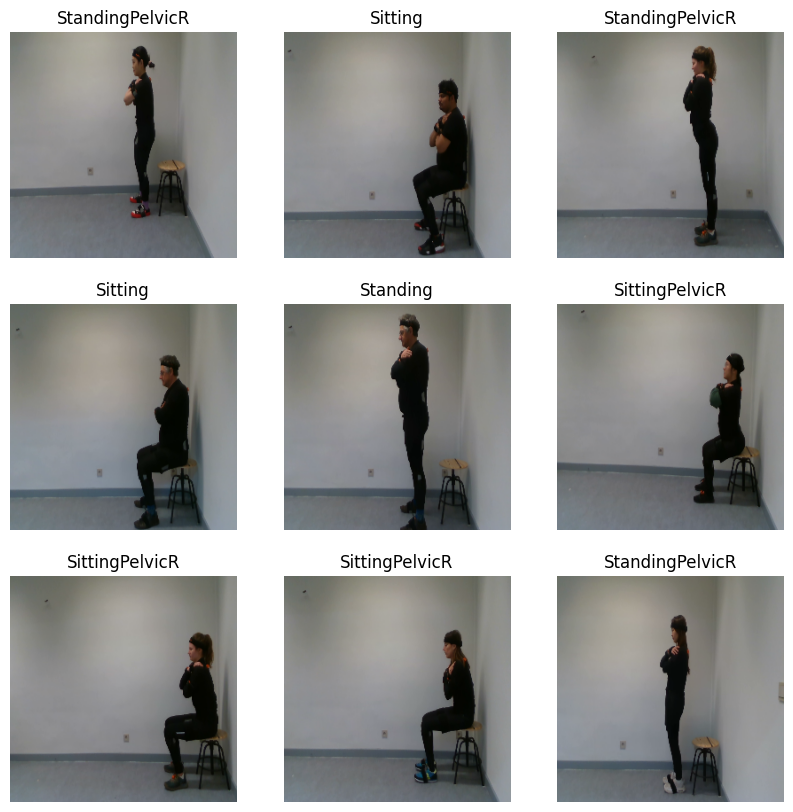

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
IMG_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255, offset=-1)
])

In [ ]:
IMG_SHAPE = (img_height, img_width) + (3,)
IMG_SHAPE

(256, 256, 3)

In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                   img_width,
                                   1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
    layers.RandomBrightness(0.2),
  ]
)

In [ ]:
base_model = tf.keras.applications.ResNet101(input_shape=IMG_SHAPE,
                                                  include_top=False,
                                                  weights='imagenet')

171446536/171446536 [==============================] - 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)

print(f'Our final feature map is: {feature_batch.shape}')

Our final feature map is: (32, 8, 8, 2048)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = resize_and_rescale(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dense(1280, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(4)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 1)     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 resnet101 (Functional)      (None, 8, 8, 2048)        42658176  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 1280)              2622720   
                                                             

In [ ]:
!pip install pydot

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_ds)

15/15 [==============================] - 229s 15s/step - loss: 2.1111 - accuracy: 0.2500


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.11
initial accuracy: 0.25


In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10
 5/45 [==>...........................] - ETA: 10:16 - loss: 2.0131 - accuracy: 0.2937

In [18]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Load the pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet101(weights='imagenet', include_top=False)

# Add your own classification layer on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
base_learning_rate = 0.0005
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model (assuming you have train_dataset and val_dataset prepared)
model.fit(train_ds, epochs=20, validation_data=validation_ds)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/20
45/45 [==============================] - 25s 373ms/step - loss: 1.0892 - accuracy: 0.5389 - val_loss: 0.8585 - val_accuracy: 0.5917
Epoch 2/20
45/45 [==============================] - 18s 331ms/step - loss: 0.7315 - accuracy: 0.6868 - val_loss: 0.5815 - val_accuracy: 0.8000
Epoch 3/20
45/45 [==============================] - 16s 330ms/step - loss: 0.5265 - accuracy: 0.8049 - val_loss: 0.4742 - val_accuracy: 0.8292
Epoch 4/20
45/45 [==============================] - 17s 336ms/step - loss: 0.4268 - accuracy: 0.8604 - val_loss: 0.3934 - val_accuracy: 0.8604
Epoch 5/20
45/45 [==============================] - 16s 332ms/step - loss: 0.3636 - accuracy: 0.8938 - val_loss: 0.3079 - val_accuracy: 0.9292
Epoch 6/20
45/45 [==============================] - 16s 324ms/step - loss: 0.2720 - accuracy: 0.9375 - val_loss: 0.2836 - val_accuracy: 0.9458
Epoch 7/20
45/45 [==============================] - 16s 331ms/step - loss: 0.2506 - accuracy: 0.9389 - val_loss: 0.2401 - val_accuracy: 0.9312

In [19]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

15/15 [==============================] - 5s 246ms/step - loss: 0.0889 - accuracy: 0.9729
Test loss: 0.08886141330003738
Test accuracy: 0.9729166626930237


1/1 [==============================] - 0s 39ms/step


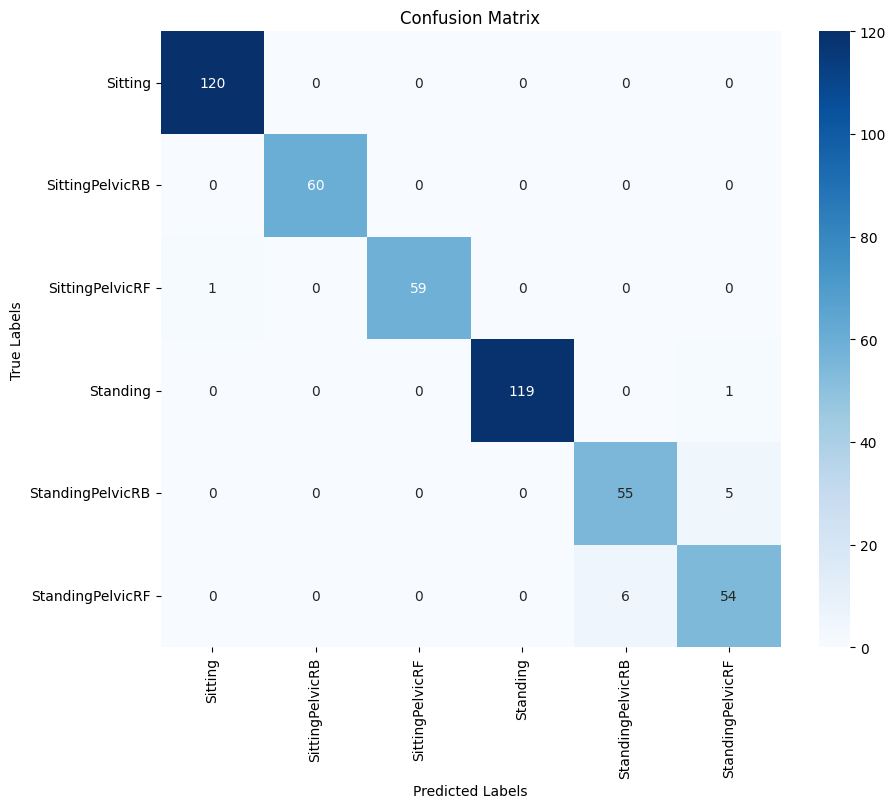

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a test dataset with ground truth labels and model predictions
y_true = []  # True labels
y_pred = []  # Predicted labels

# Iterate over the test dataset and collect true and predicted labels
for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Assuming labels are in numpy arrays
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusionMatrixResnet101.png')
plt.show()